In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
%matplotlib inline

In [76]:
from IPython.core.display import HTML
HTML("""
<style>

div.cell { /* Tunes the space between cells */
margin-top:1em;
margin-bottom:1em;
}

div.text_cell_render h1 { /* Main titles bigger, centered */
font-size: 1.5em;
line-height:1.4em;
text-align:center;
}

div.text_cell_render h2 { /*  Parts names nearer from text */
margin-bottom: -0.4em;
}


div.text_cell_render { /* Customize text cells */
font-family: 'Times New Roman';
font-size:1.3em;
line-height:1.4em;
padding-right:3em;
}
</style>
""")

Read train and test datas.

In [77]:
data_train = pd.read_csv("train (1).csv")
data_test = pd.read_csv("test (1).csv")

In [78]:
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Note that we have missing values in Age. we fill them with age median.

In [79]:
data_train["Age"].fillna(data_train["Age"].median(), inplace=True)
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<h1><center>Plotting Data</center></h1>

In [80]:
survived_sex = data_train[data_train['Survived'] == 1]['Sex'].value_counts()
dead_sex = data_train[data_train['Survived'] == 0]['Sex'].value_counts()
survived_sex

female    233
male      109
Name: Sex, dtype: int64

In [81]:
dead_sex

male      468
female     81
Name: Sex, dtype: int64

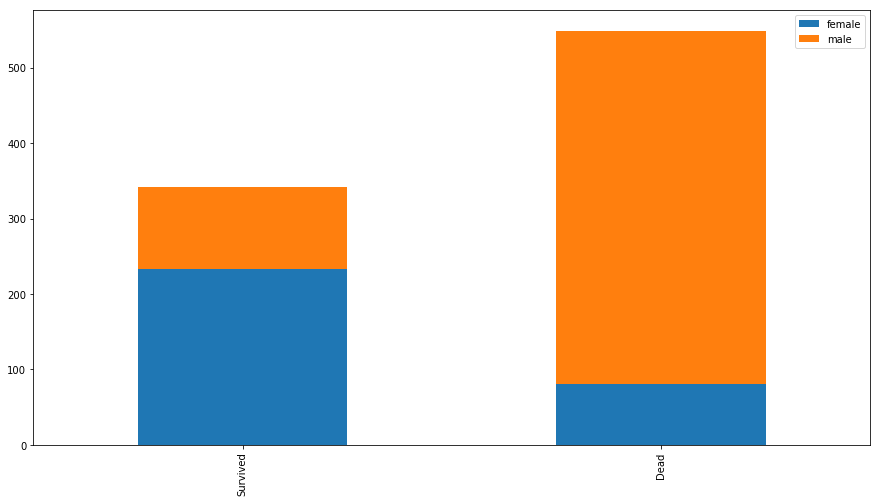

In [82]:
df = pd.DataFrame([survived_sex,dead_sex])
df.index = ['Survived','Dead']
df.plot(kind='bar',stacked=True, figsize=(15,8))

Women were survived more than men.
now let's do this with age.

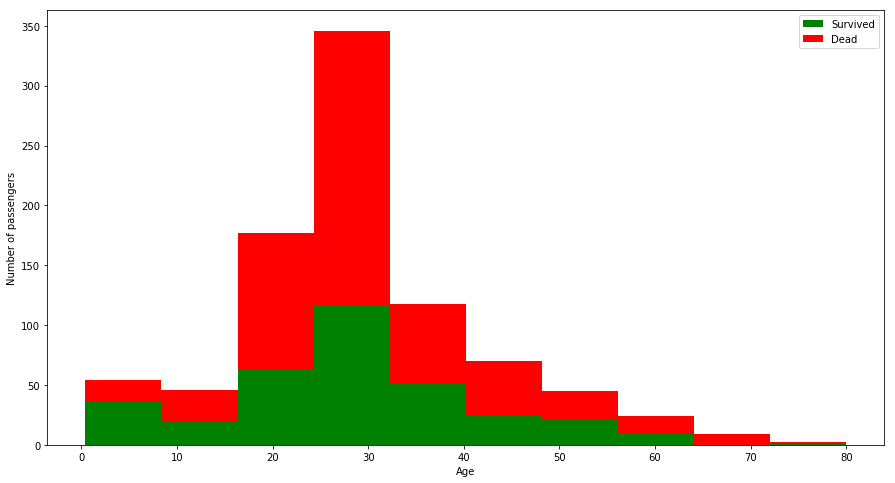

In [102]:
figure = plt.figure(figsize=(15,8))
plt.hist([data_train[data_train['Survived'] == 1]['Age'] , data_train[data_train['Survived'] == 0]['Age']] 
         ,stacked= True 
         , color= ['g' , 'r'] 
         ,label= ['Survived' , 'Dead'])
plt.xlabel('Age')
plt.ylabel('Number of passengers')
plt.legend()

Children and elderly was rescued more often.

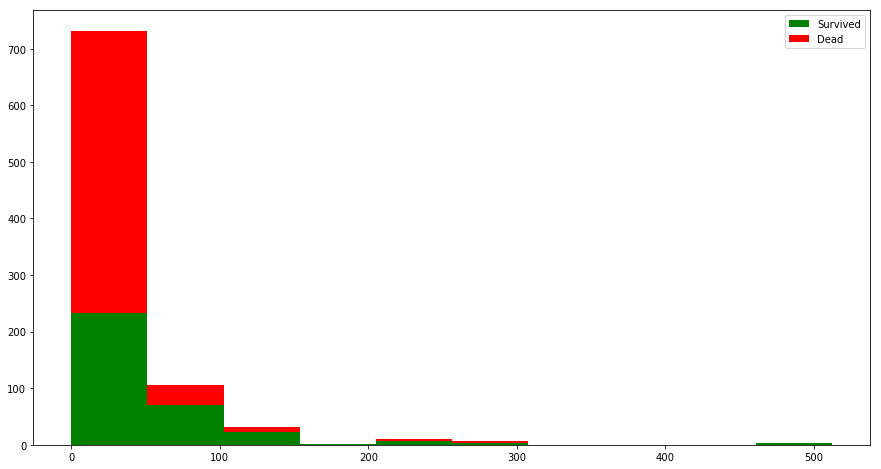

In [84]:
figure = plt.figure(figsize=(15,8))
plt.hist([data_train[data_train['Survived'] == 1]['Fare'] , data_train[data_train['Survived'] == 0]['Fare']] 
         ,stacked= True 
         , color= ['g' , 'r'] 
         ,label= ['Survived' , 'Dead'])
plt.legend()

People with lower TickerFare (lower ticket price) were died more often and people with better tickets (people with higher social/economic ranks) survived more often.

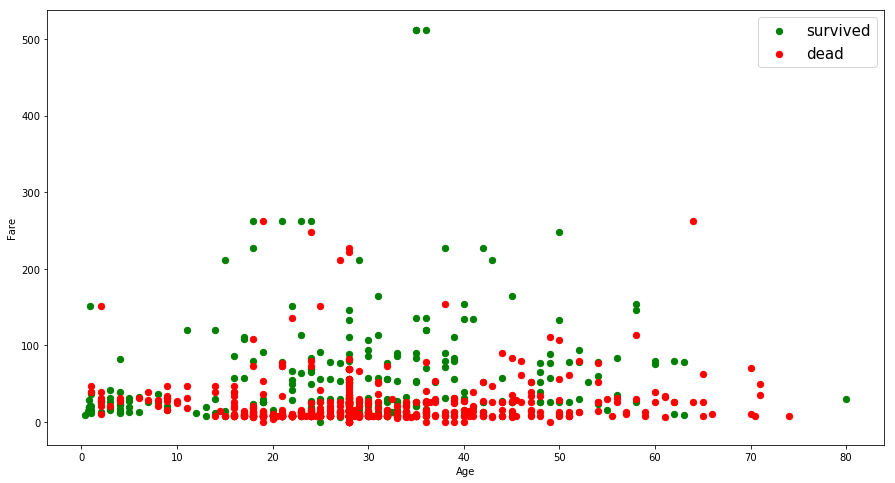

In [85]:
plt.figure(figsize=(15,8))
ax = plt.subplot()
ax.scatter(data_train[data_train['Survived']==1]['Age'],data_train[data_train['Survived']==1]['Fare'],c='green',s=40)
ax.scatter(data_train[data_train['Survived']==0]['Age'],data_train[data_train['Survived']==0]['Fare'],c='red',s=40)
ax.set_xlabel('Age')
ax.set_ylabel('Fare')
ax.legend(('survived','dead'),scatterpoints=1,loc='upper right',fontsize=15,)

Like previous statement, people with higher tickerfare tend to survive more often.

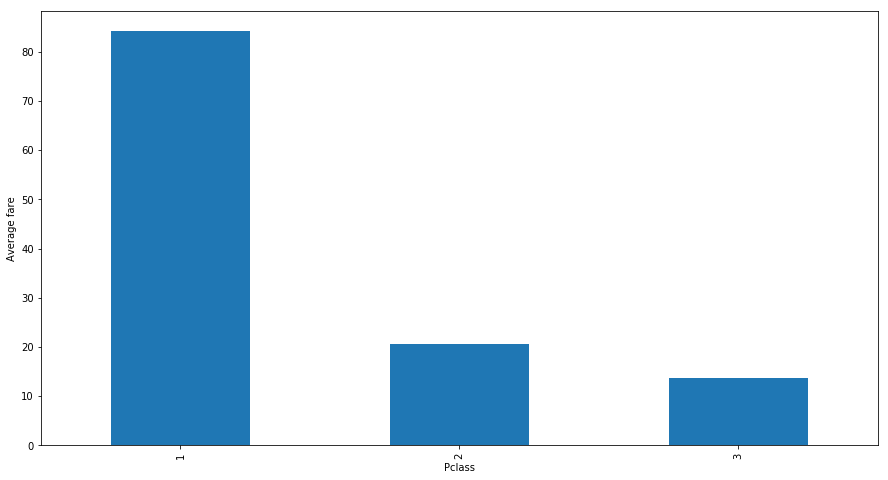

In [86]:
ax = plt.subplot()
ax.set_ylabel('Average fare')
data_train.groupby('Pclass').mean()['Fare'].plot(kind='bar',figsize=(15,8), ax = ax)

People with higher ticketfare are in better Pclasses (they are richer.)

Now we analyze embarks and their effects on survival of passengers.

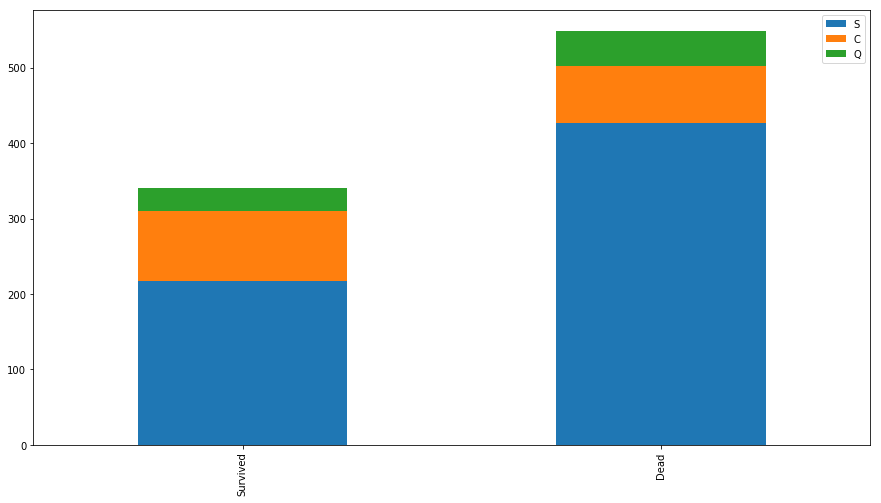

In [87]:
survived_embark = data_train[data_train['Survived'] == 1]['Embarked'].value_counts()
dead_embark = data_train[data_train['Survived'] == 0]['Embarked'].value_counts()
df = pd.DataFrame([survived_embark,dead_embark])
df.index = ['Survived','Dead']
df.plot(kind='bar',stacked=True, figsize=(15,8))

In [88]:
 data_train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

So we can not obtain any useful knowledge from this. (because number of dead/survived match with count of embarks values)

In [89]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Now we begin to clean and organize our train data.

<h1><center>Cleaning Data</center></h1>

Each name has a prefix (like mr,mrs and ...). we want to get them.

In [90]:
prefix_names = dict({"Mr." : 1,
                    "Mrs." : 2,
                    "Miss.": 3,
                    "Master." : 4,
                    "Don." : 5,
                    "Sir." : 6,
                    "Dr." : 7,
                    "Col." : 8})

In [91]:
def prefix_names_change(my_data, my_prefix_names):
    length = my_data.shape[0]
    for new_column_name in my_prefix_names:
        my_data[new_column_name] = pd.Series(np.zeros(length), index=my_data.index)
        for i in range(length):
            if new_column_name in str(my_data.loc[i,"Name"]):
                #my_data.loc[i,new_column_name] = my_prefix_names[new_column_name]
                 my_data.loc[i,new_column_name] = 1.0
    print("Data pre-processing: Prefix names completed.")
    return my_data

In [92]:
data_train = prefix_names_change(data_train, prefix_names)
data_train = data_train.drop("Name" , axis=1)

Data pre-processing: Prefix names completed.


In [93]:
data_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Mr.,Mrs.,Miss.,Master.,Don.,Sir.,Dr.,Col.
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Change sex data to integers (0,1)

In [94]:
def sex_category_change(my_data):
    male_index = my_data.query('Sex == "male"').index
    female_index = my_data.query('Sex == "female"').index
    my_data.loc[male_index,"Sex"] = 0
    my_data.loc[female_index,"Sex"] = 1
    print("Data pre-processing: Sex category changes completed.")
    return my_data

In [95]:
data_train = sex_category_change(data_train)

Data pre-processing: Sex category changes completed.


In [65]:
%qtconsole

Note: <br> loc works on labels in the index. <br> iloc works on the positions in the index (so it only takes integers).


In [96]:
data_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Mr.,Mrs.,Miss.,Master.,Don.,Sir.,Dr.,Col.
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Fix Pclass data

In [97]:
def pclass_category_change(my_data):
    new_cols_pclass = pd.get_dummies(my_data["Pclass"], prefix="Pclass")
    my_data = pd.concat([my_data,new_cols_pclass],axis=1)
    my_data.drop('Pclass' , axis=1 , inplace=True)
    print("Data pre-processing: Pclass category changes completed.")
    return my_data

In [98]:
def embarked_category_change(my_data):
    new_cols_pclass = pd.get_dummies(my_data["Embarked"], prefix="Embarked")
    my_data = pd.concat([my_data,new_cols_pclass],axis=1)
    my_data.drop('Embarked' , axis=1 , inplace=True)
    print("Data pre-processing: Pclass category changes completed.")
    return my_data

In [99]:
data_train = pclass_category_change(data_train)
data_train = embarked_category_change(data_train)

Data pre-processing: Pclass category changes completed.
Data pre-processing: Pclass category changes completed.


In [100]:
data_train.head()

,PassengerId,Survived,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Mr.,...,Don.,Sir.,Dr.,Col.,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,1,0,0,22.0,1,0,A/5 21171,7.2500,NaN,1.0,...,0.0,0.0,0.0,0.0,0,0,1,0,0,1
1,2,1,1,38.0,1,0,PC 17599,71.2833,C85,0.0,...,0.0,0.0,0.0,0.0,1,0,0,1,0,0
2,3,1,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0,...,0.0,0.0,0.0,0.0,0,0,1,0,0,1
3,4,1,1,35.0,1,0,113803,53.1000,C123,0.0,...,0.0,0.0,0.0,0.0,1,0,0,0,0,1
4,5,0,0,35.0,0,0,373450,8.0500,NaN,1.0,...,0.0,0.0,0.0,0.0,0,0,1,0,0,1
5,6,0,0,28.0,0,0,330877,8.4583,NaN,1.0,...,0.0,0.0,0.0,0.0,0,0,1,0,1,0
6,7,0,0,54.0,0,0,17463,51.8625,E46,1.0,...,0.0,0.0,0.0,0.0,1,0,0,0,0,1
7,8,0,0,2.0,3,1,349909,21.0750,NaN,0.0,...,0.0,0.0,0.0,0.0,0,0,1,0,0,1
8,9,1,1,27.0,0,2,347742,11.1333,NaN,0.0,...,0.0,0.0,0.0,0.0,0,0,1,0,0,1
9,10,1,1,14.0,1,0,237736,30.0708,NaN,0.0,...,0.0,0.0,0.0,0.0,0,1,0,1,0,0
